In [5]:
import torch
from AHP_Dataset import AHP_Dataset as AHP
from custom_models.SS_v1 import SS_v1
import SupervisedMLFramework as sml
import matplotlib.pyplot as plt
from custom_models.unet_batchnorm import UNet
import time

TRAIN_MAPPING = "data\\AHP\\train_annotations.pkl"
TEST_MAPPING = "data\\AHP\\test_annotations.pkl"
IMG_DIR = "data\\AHP\\AHP\\train\\Processed_Images"
GT_DIR = "data\\AHP\\AHP\\train\\Processed_Annotations"

In [6]:
file_path = "C:\\Users\\sayba\\Documents\\University\\Spring_2023_T8\\1896\\human_segmentation\\checkpoints\\long_trains\\UNet_Standard_BatchNorm.pt"

model_save = torch.load(file_path)

obj365_train_000000144414_000
prediction time: 0.03696703910827637


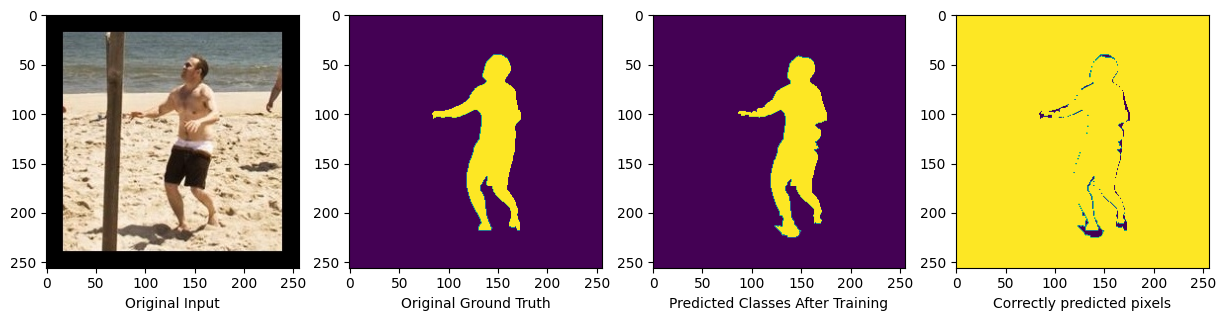

obj365_train_000000709861_001
prediction time: 0.01751565933227539


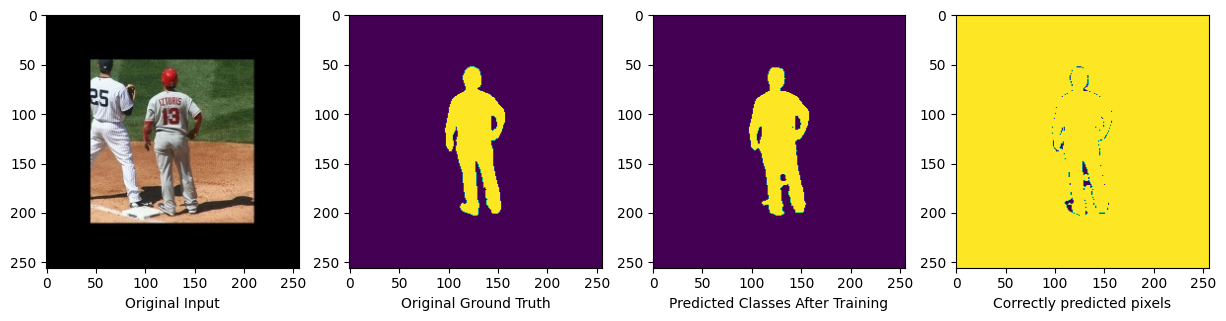

COCO_val2014_000000530337_sp_00
prediction time: 1.2471644878387451


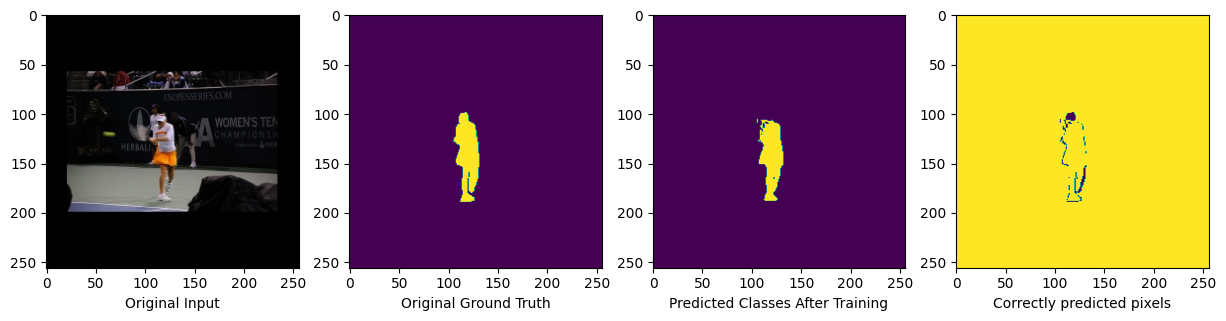

obj365_train_000000611041_004
prediction time: 0.01746678352355957


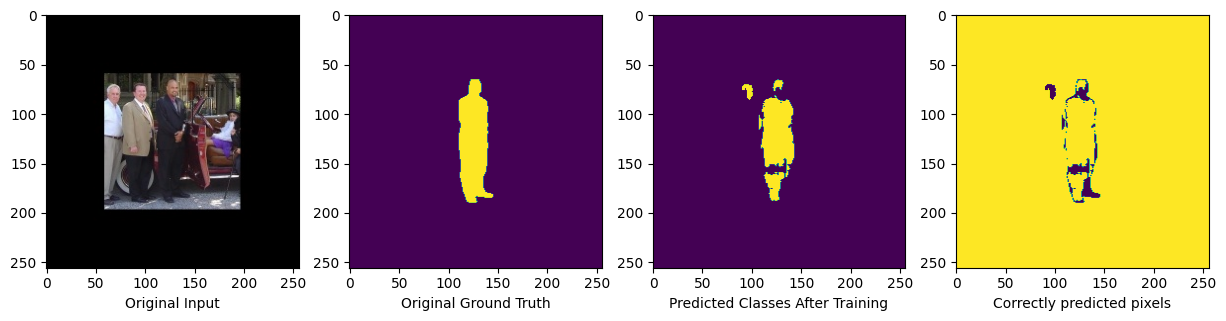

obj365_train_000000071417_001
prediction time: 1.5260396003723145


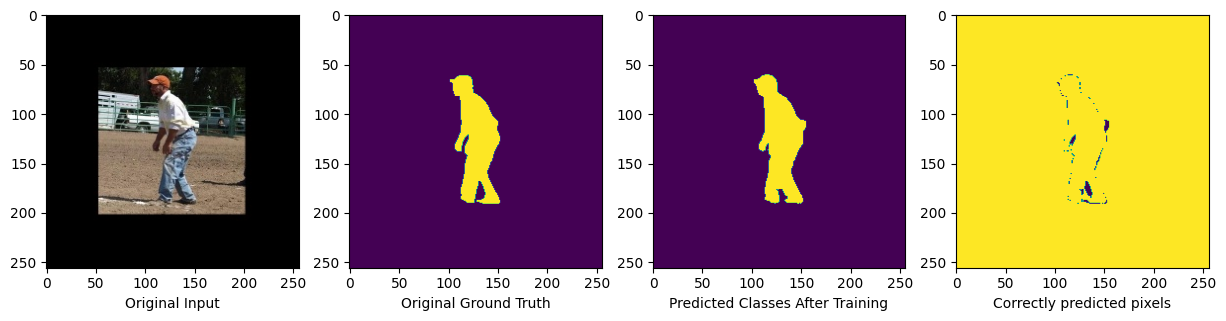

obj365_train_000000301055_000
prediction time: 0.021971702575683594


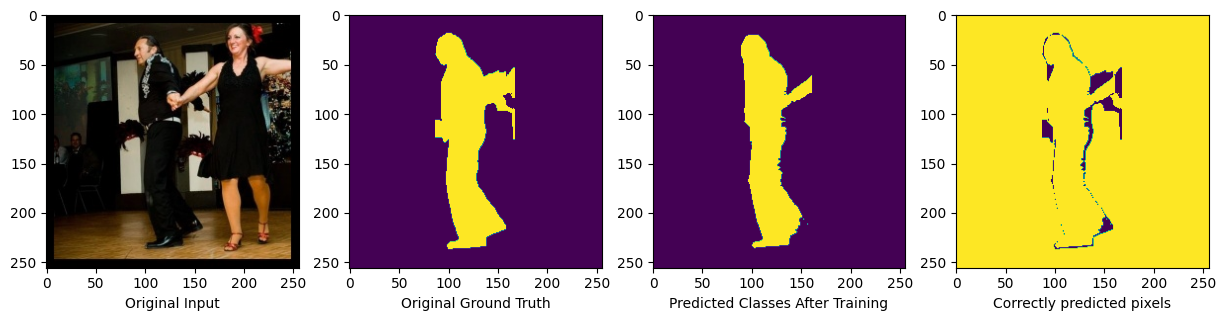

openimages_79bbd299d81599c5_000
prediction time: 0.021973848342895508


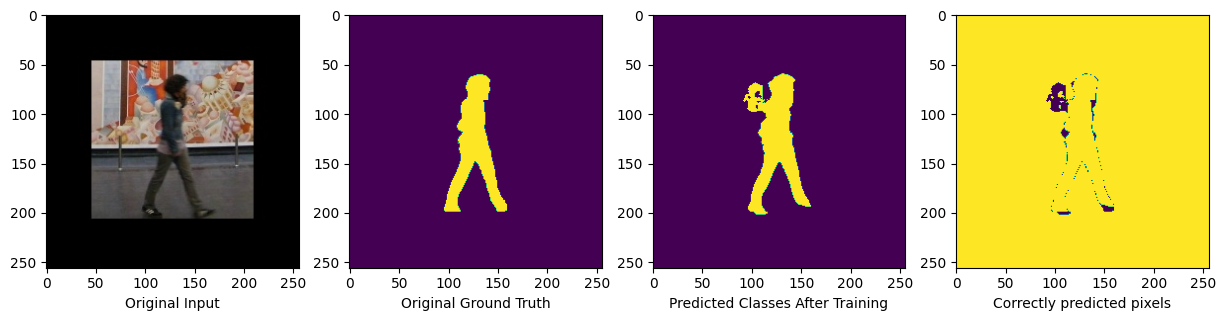

COCO_val2014_000000146676_sp_00
prediction time: 2.066333055496216


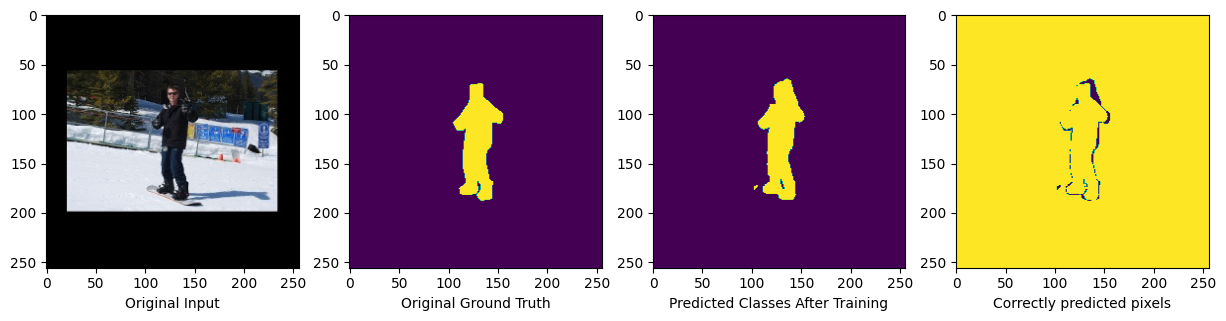

obj365_train_000000497296_000
prediction time: 0.022466182708740234


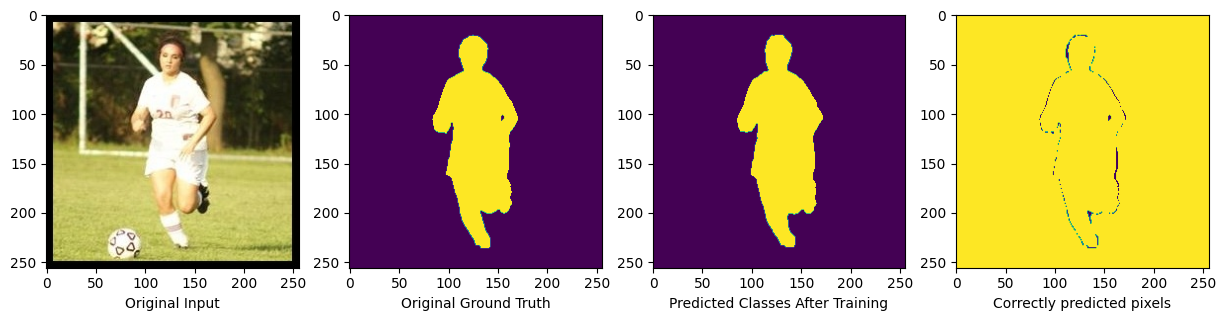

COCO_val2014_000000168248_sp_00
prediction time: 1.4028873443603516


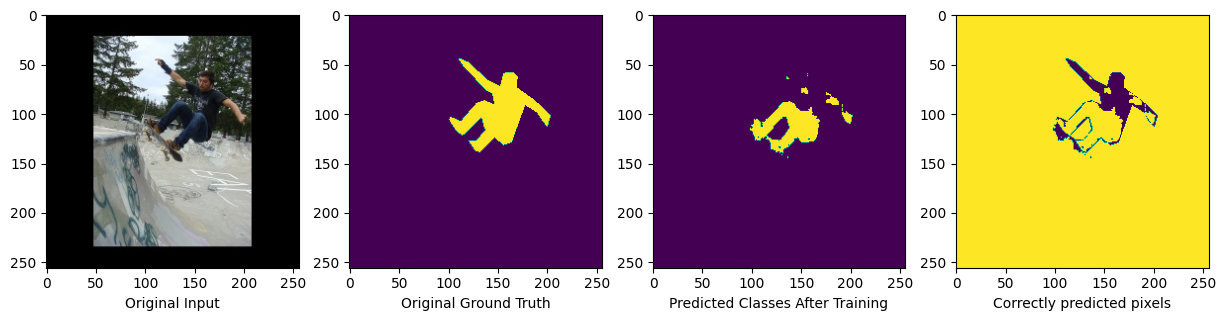

openimages_000000122277_000
prediction time: 0.020972013473510742


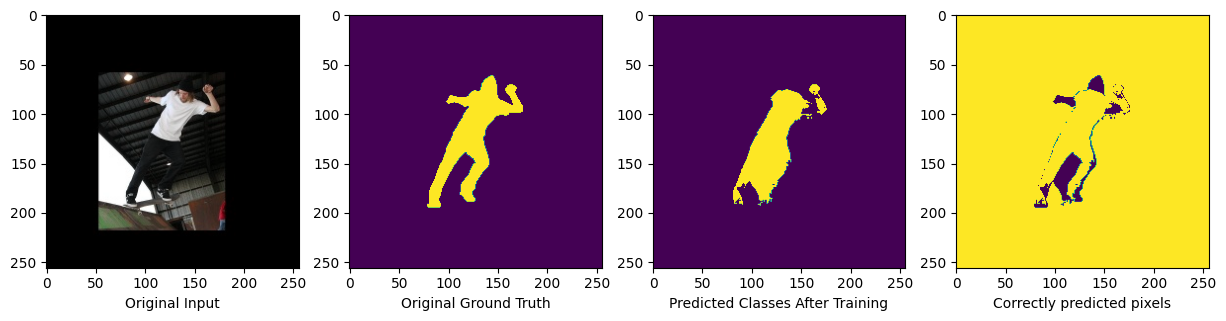

obj365_train_000000693812_000
prediction time: 0.0209958553314209


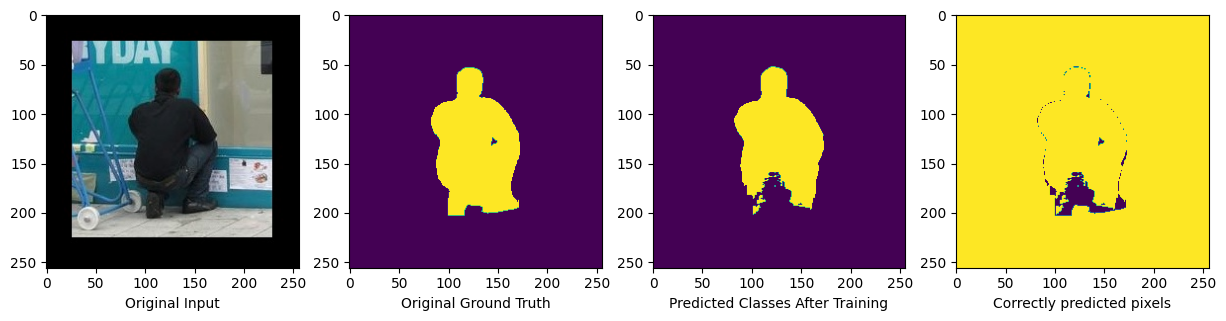

obj365_train_000000698667_000
prediction time: 1.6161727905273438


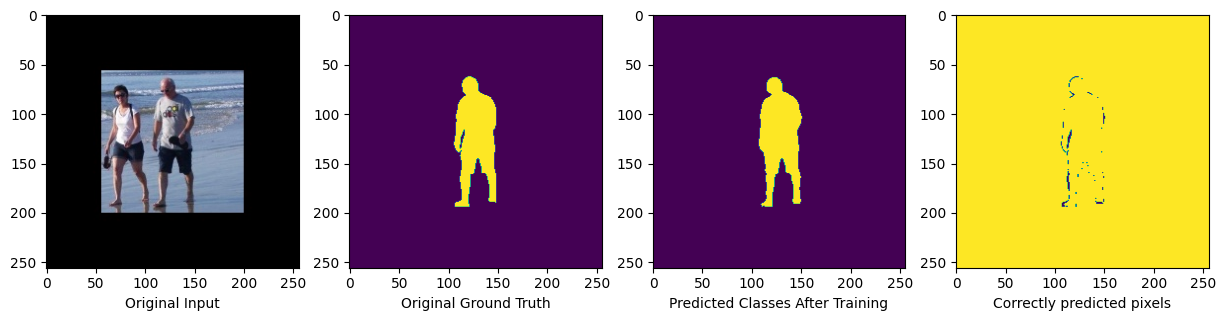

obj365_train_000000721329_000
prediction time: 0.017978906631469727


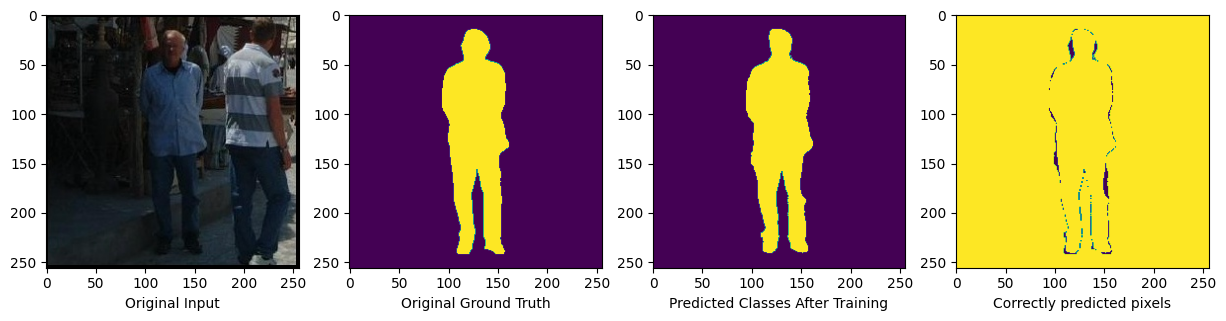

obj365_val_000000114975_002
prediction time: 0.018012523651123047


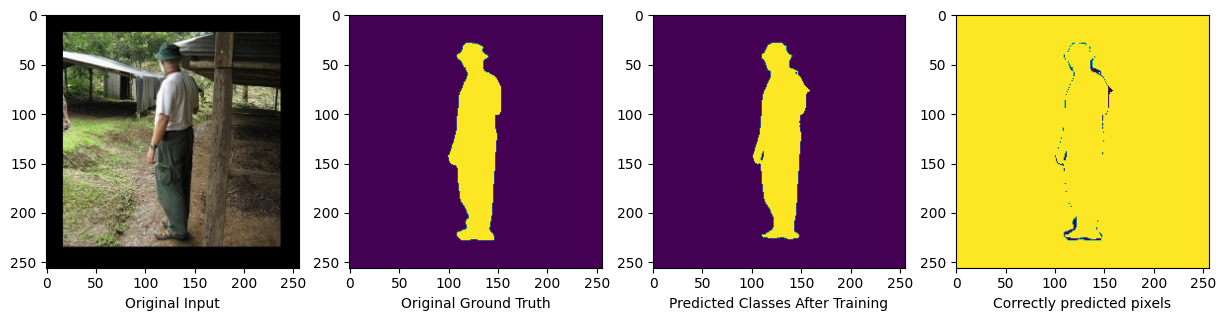

obj365_train_000000332482_000
prediction time: 0.9074349403381348


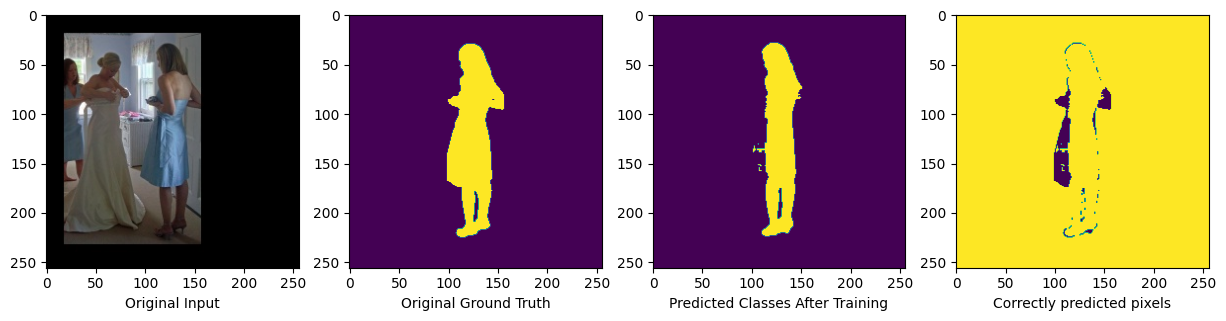

obj365_train_000000342738_000
prediction time: 0.01700878143310547


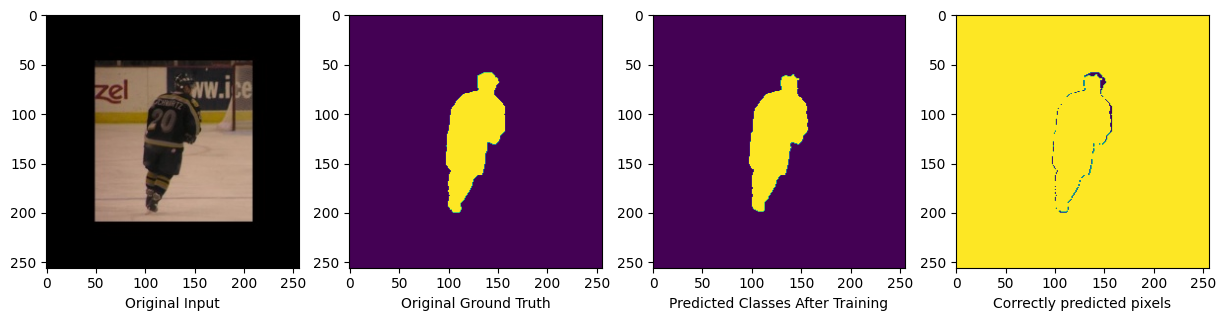

openimages_000000314704_000
prediction time: 0.017976760864257812


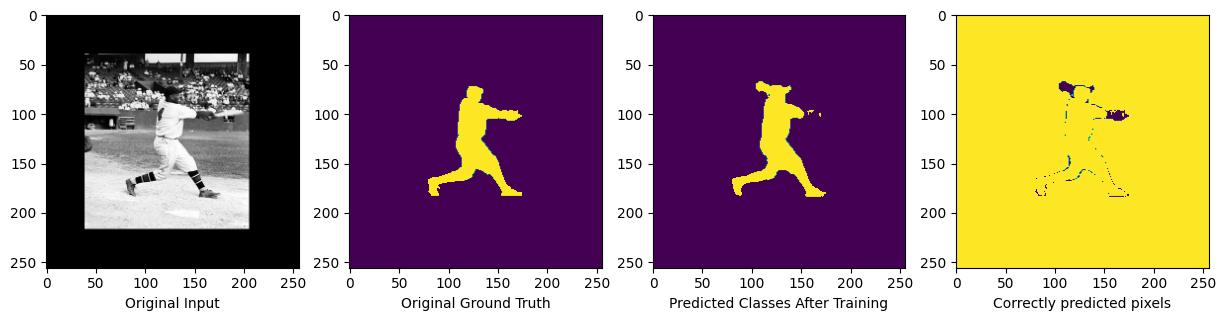

openimages_000000203372_000
prediction time: 1.025496482849121


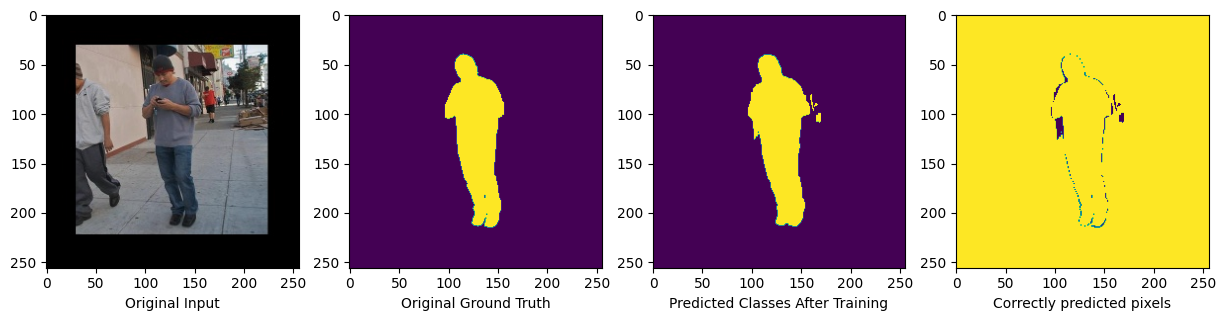

obj365_train_000000211479_001
prediction time: 0.01747870445251465


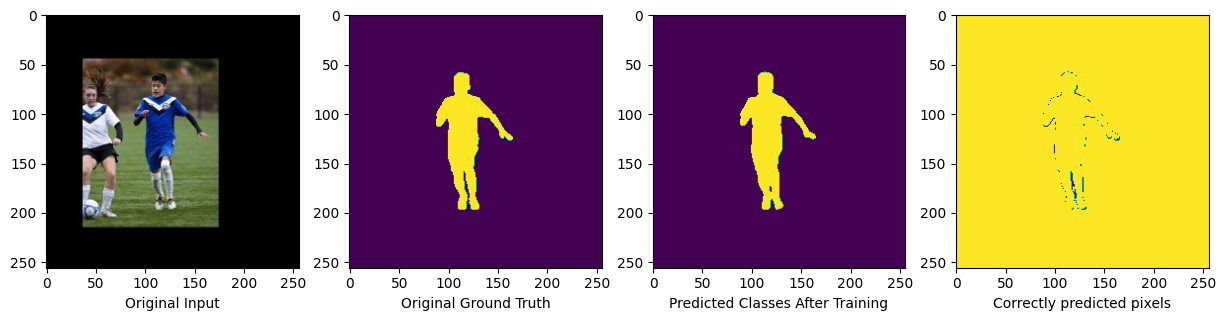

obj365_train_000000515909_000
prediction time: 0.0179746150970459


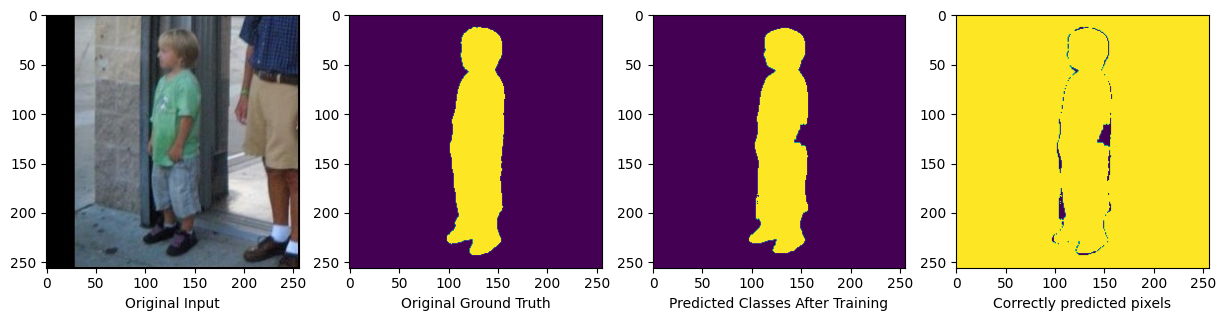

openimages_fa74efda357c7d08_001
prediction time: 1.0767881870269775


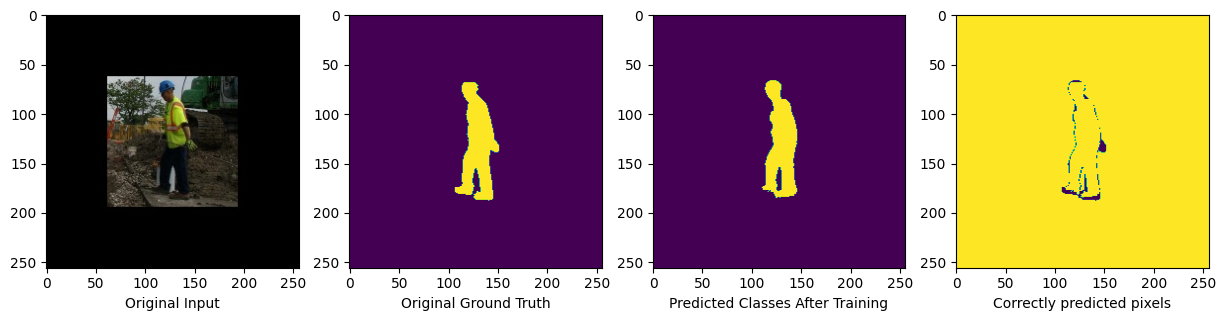

obj365_train_000000289216_001
prediction time: 0.017995357513427734


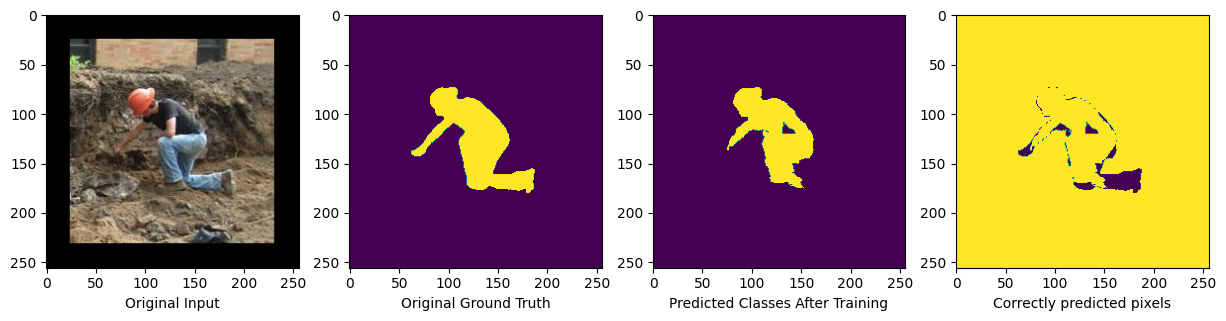

obj365_train_000000590096_001
prediction time: 2.4100236892700195


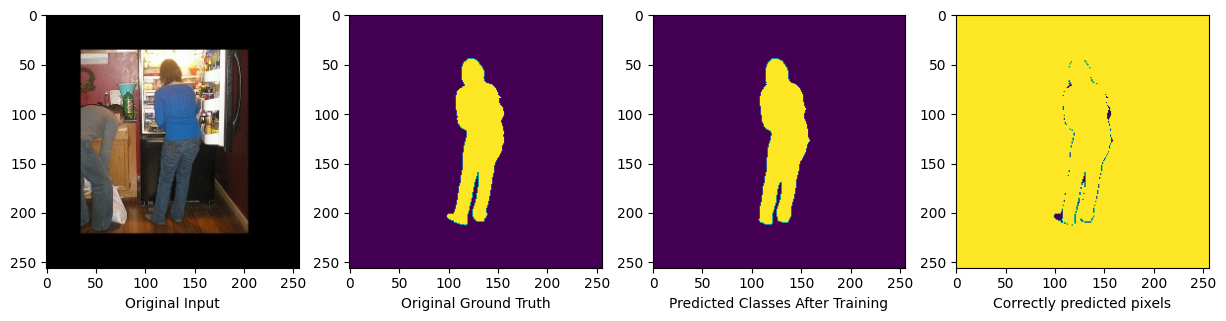

obj365_train_000000563209_000
tensor(0.9886)


In [7]:
model = UNet()
model.load_state_dict(model_save['model_state_dict'])
test_dataset = AHP(TEST_MAPPING, IMG_DIR, GT_DIR)
train_dataset = AHP(TRAIN_MAPPING, IMG_DIR, GT_DIR)

model = sml.SupervisedMLFramework("eval", model, None, None, init_weights=False, batch_size=32)


avg_percent_pixels_correct = 0
for i, (X, y) in enumerate(test_dataset):

    if i==24:
        break

    fig, axs = plt.subplots(1,4)
    fig.set_size_inches(15,20)

    axs[0].imshow(X.permute(1,2,0))
    axs[0].set_xlabel("Original Input")

    axs[1].imshow(y)
    axs[1].set_xlabel("Original Ground Truth")


    X = torch.unsqueeze(X, dim=0)
    y = torch.unsqueeze(y, dim=0)

    now = time.time()

    pred = model.predict(X)

    print(f"prediction time: {time.time() - now}")
    axs[2].imshow(pred)
    axs[2].set_xlabel("Predicted Classes After Training")

    axs[3].imshow(torch.squeeze(torch.unsqueeze(pred, dim=0) == y))
    axs[3].set_xlabel("Correctly predicted pixels")
    plt.show()
    #print(torch.unsqueeze(pred, dim=0).shape)
    # print(y.shape)
    avg_percent_pixels_correct += torch.sum(torch.unsqueeze(pred, dim=0) == y) / y.shape[1]**2

print(avg_percent_pixels_correct / 24)
#print(avg_percent_pixels_correct)
#print(pred.shape)
# print(pred.shape)
# print(y.shape)